In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_labels = None
train_images = None
test_labels = None
test_images = None
class_names = None
history = None

In [4]:
def processDataset():
    global train_labels
    global train_images
    global test_labels
    global test_images
    global class_names
    
    (train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
    
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
print(train_labels)
processDataset()
print(train_labels)
print(test_labels)

None
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


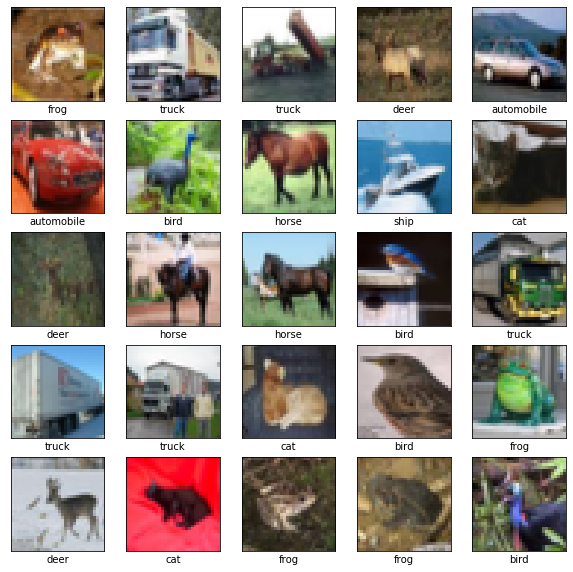

In [5]:
def showDataset():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()
    
showDataset()

In [6]:
def evaluateModel(model):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print('Acc: ' + str(test_acc))
    print('Loss:' + str(test_loss))

In [7]:
def showPredictions(model):
    probability_model = keras.Sequential([model, keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    
    
    
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()


    
    
    
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')


In [8]:
def showLoss():
    plt.figure(2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 2])
    plt.legend(loc='lower right')

In [9]:
def showAccuracy():
    plt.figure(1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

In [10]:
def trainModelAdam(model, epochCount):
    global history
    
    model.summary()
    
    #model.build()
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=epochCount, 
                    validation_data=(test_images, test_labels))
    
    evaluateModel(model)
    showPredictions(model)
    showAccuracy()
    showLoss()
    
    

In [11]:
def trainModelAdamax(model, epochCount):
    global history
    
    model.summary()
    
    #model.build()
    
    model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=epochCount, 
                    validation_data=(test_images, test_labels))
    
    evaluateModel(model)
    showPredictions(model)
    showAccuracy()
    showLoss()
    

### Adam Relu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0

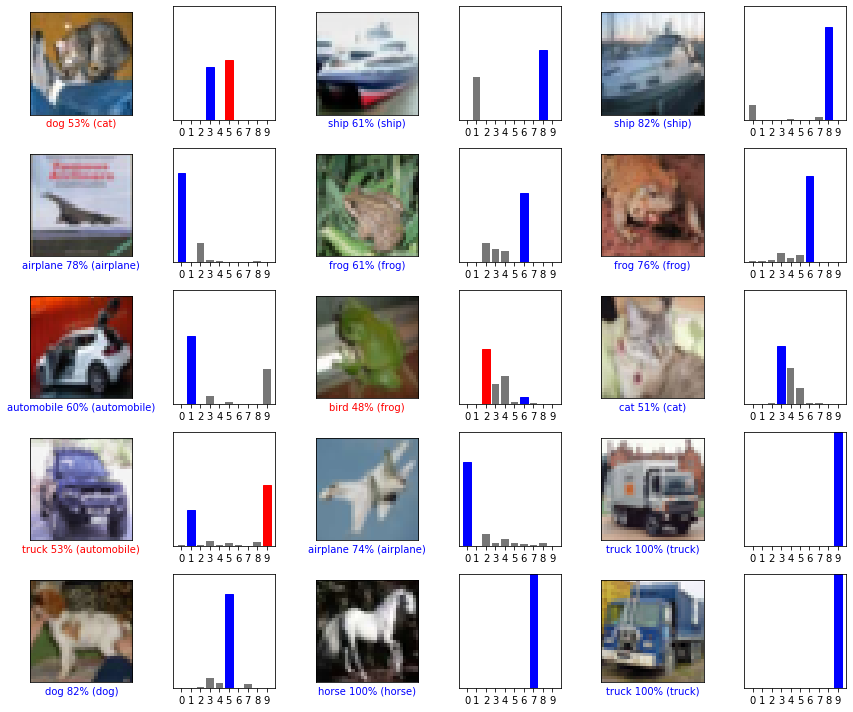

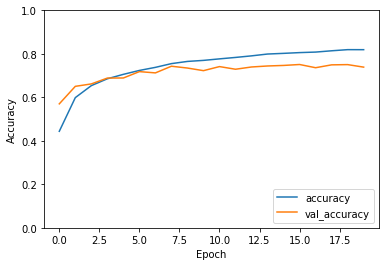

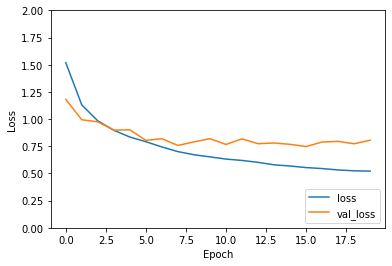

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdam(model, 20)

### Adam Elu

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)        

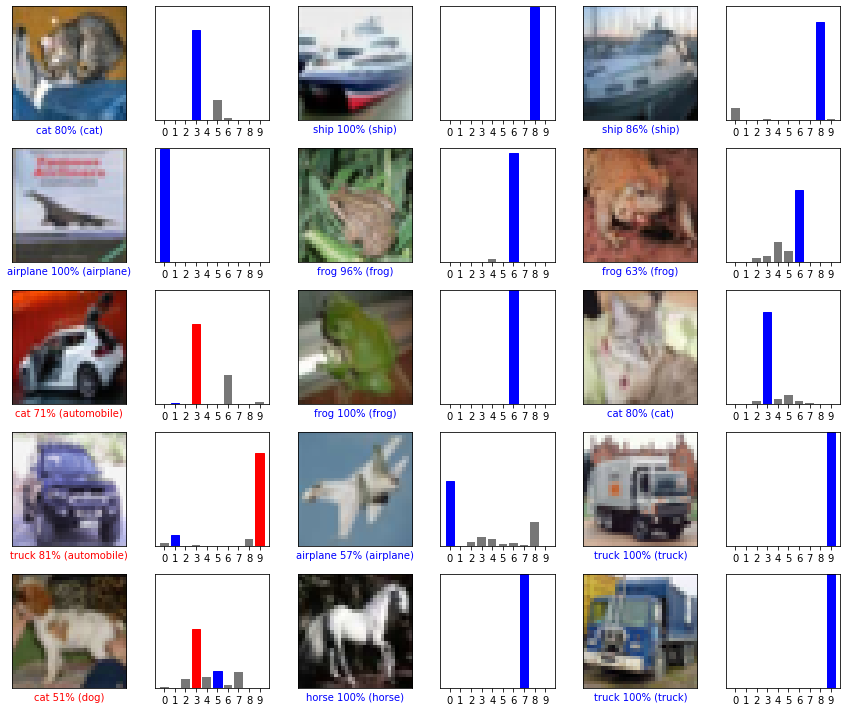

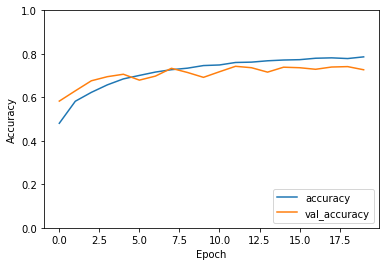

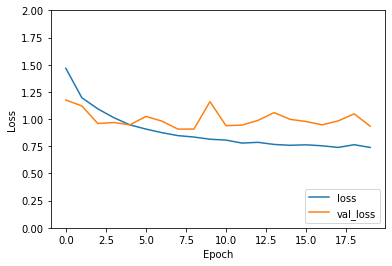

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='elu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='elu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='elu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='elu'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdam(model, 20)

### Adam Selu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0

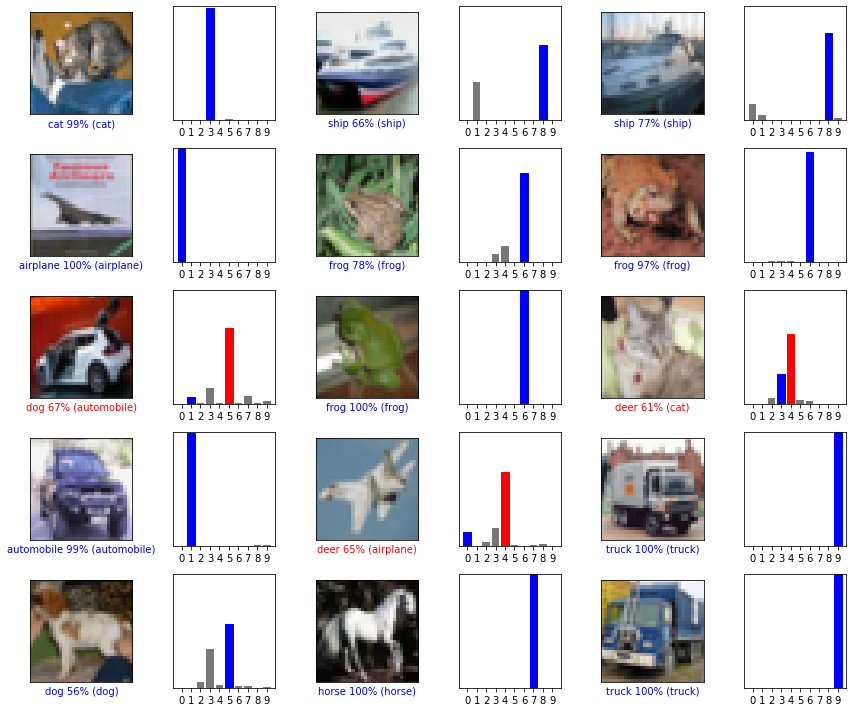

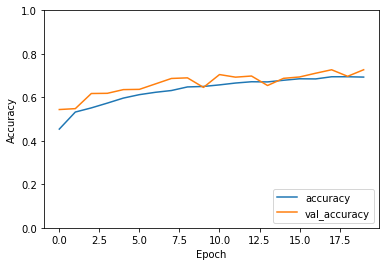

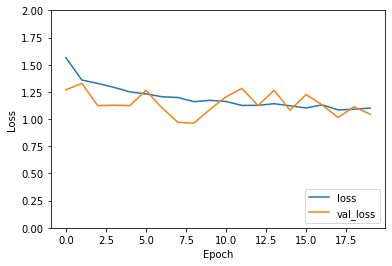

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='selu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='selu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='selu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='selu'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdam(model, 20)

### Adam TanH

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)        

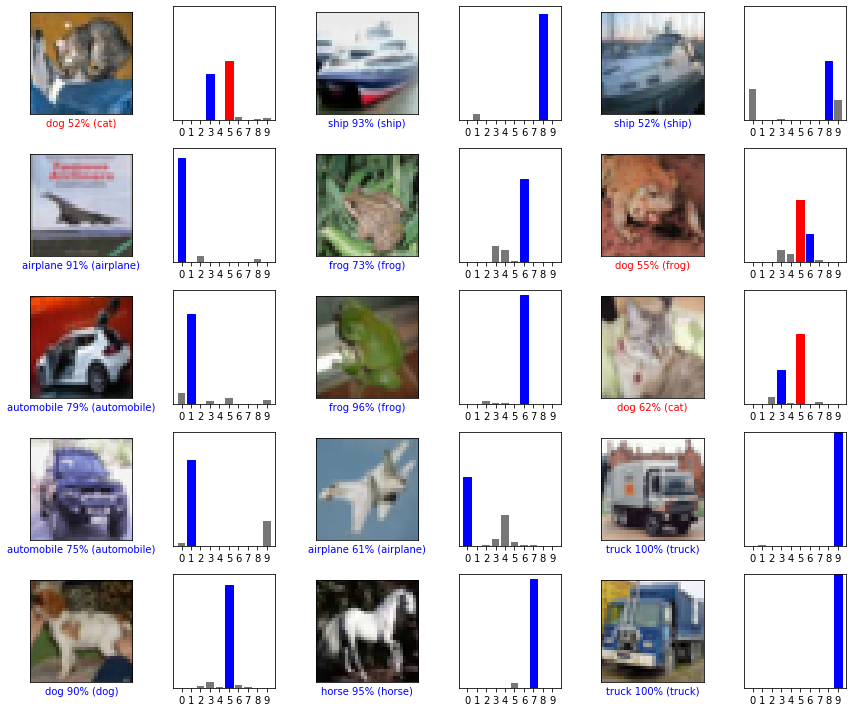

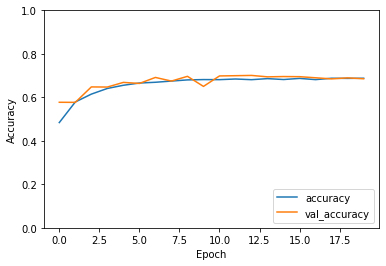

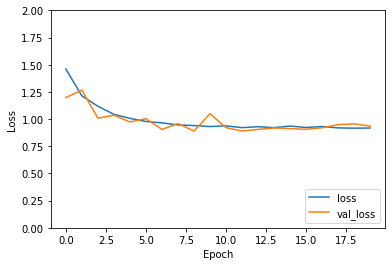

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='tanh', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='tanh'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='tanh'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='tanh'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdam(model, 20)

### Adam Sigmoid

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)        

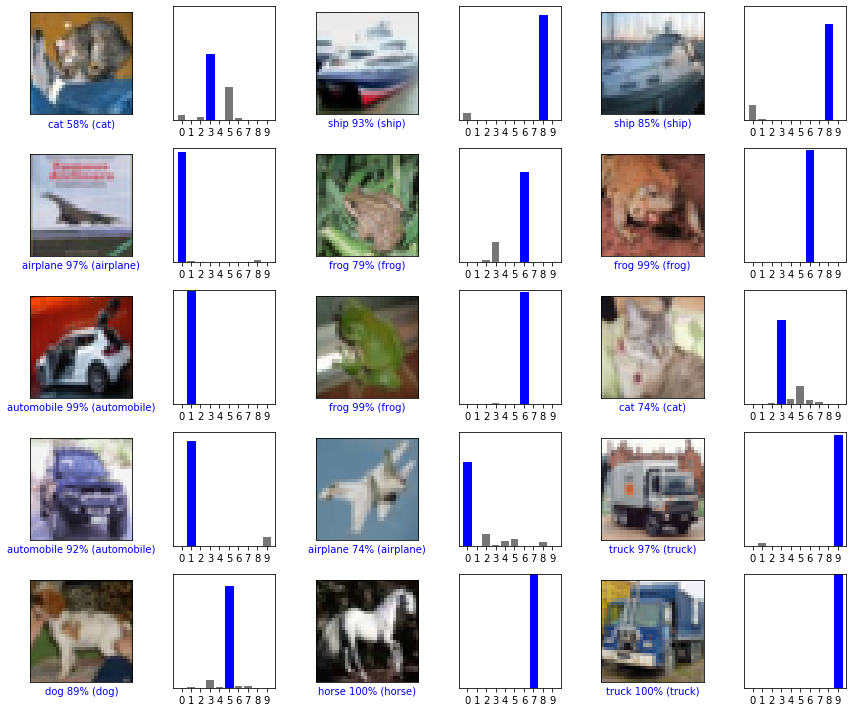

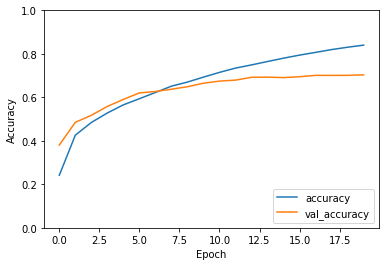

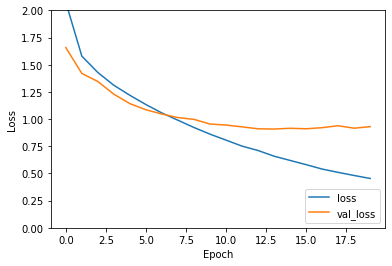

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='sigmoid', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='sigmoid'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='sigmoid'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdam(model, 20)

### Adamax Relu

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)        

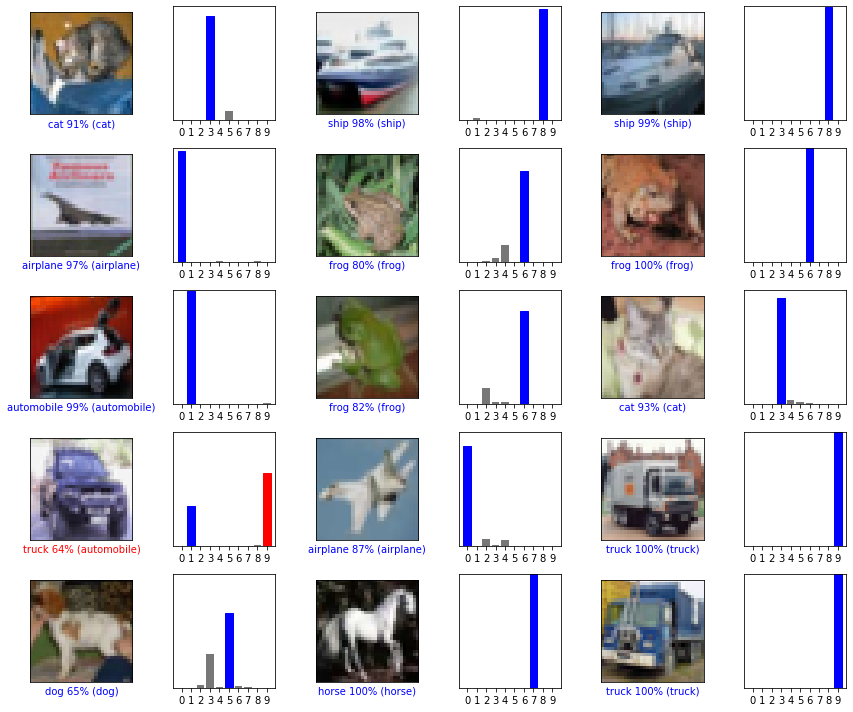

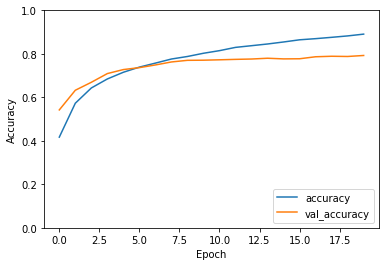

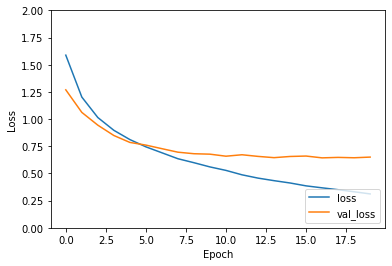

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdamax(model, 20)

### Adamax Elu

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 128)        

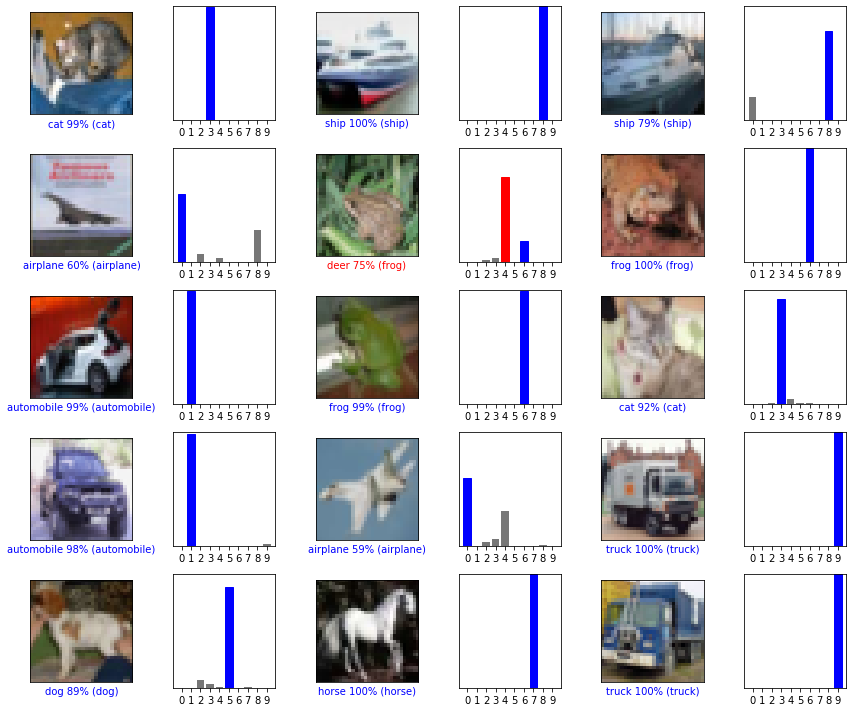

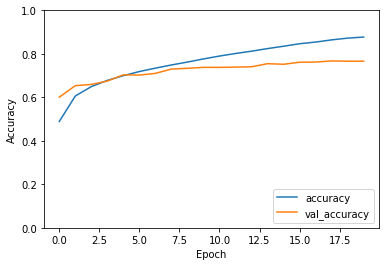

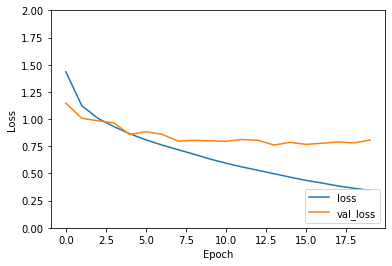

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='elu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='elu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='elu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='elu'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdamax(model, 20)

### Adamax Selu

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 128)       

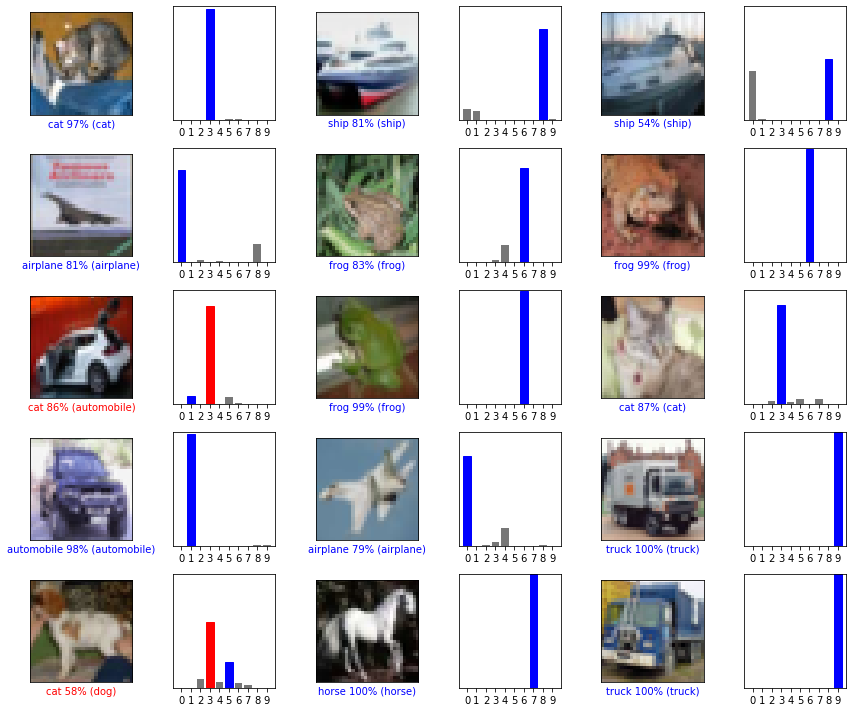

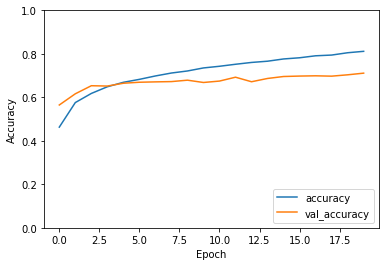

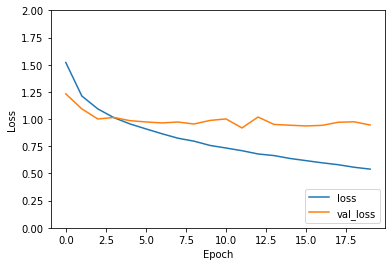

In [17]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='selu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='selu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='selu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='selu'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdamax(model, 20)

### Adamax TanH

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)       

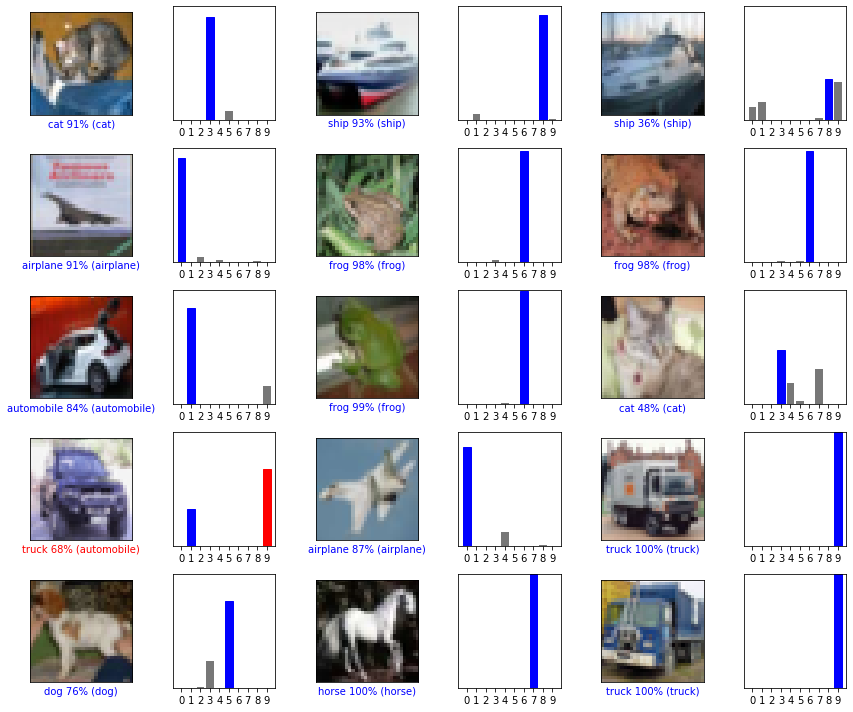

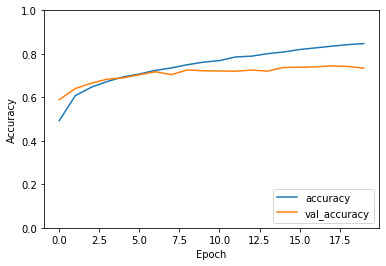

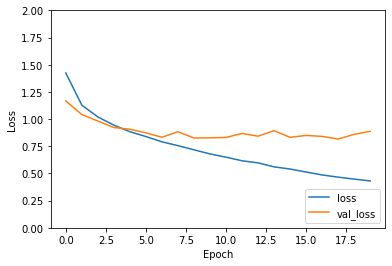

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='tanh', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='tanh'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='tanh'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='tanh'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdamax(model, 20)

### Adamax Sigmoid

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 128)       

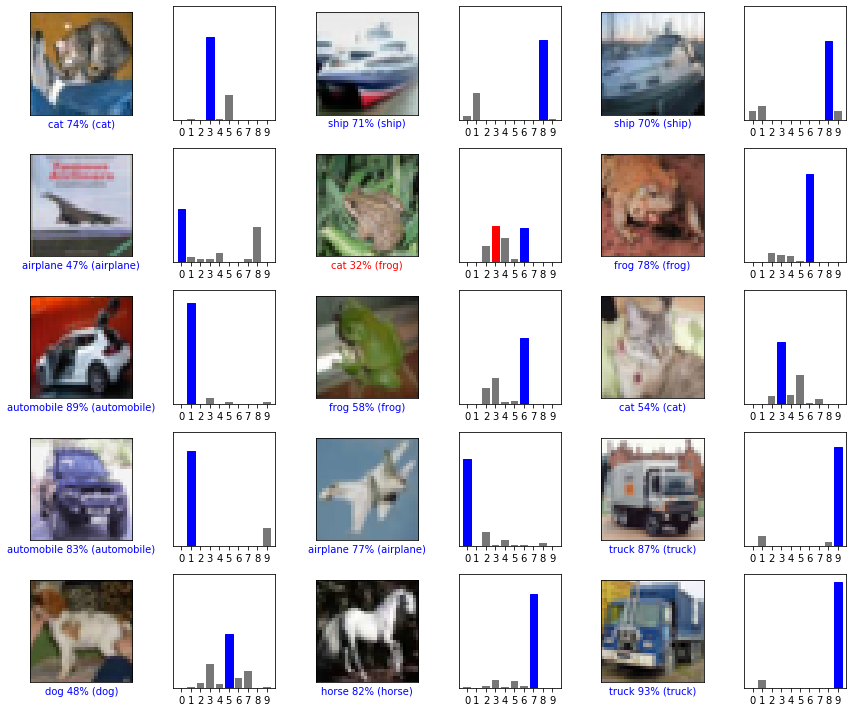

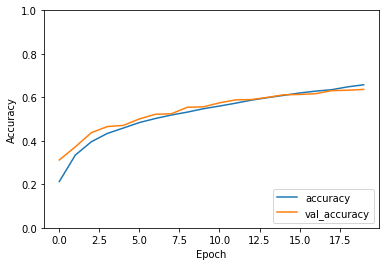

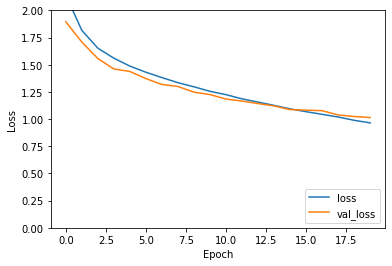

In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", activation='sigmoid', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(64, (5, 5), padding="same", activation='sigmoid'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (5, 5), padding="same", activation='sigmoid'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dropout(0.4),                     
    keras.layers.Dense(10)
])

trainModelAdamax(model, 20)